In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
#url = https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [134]:
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**Charts to plot:**
1. Create a pie chart presenting the male/female proportion

In [135]:
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

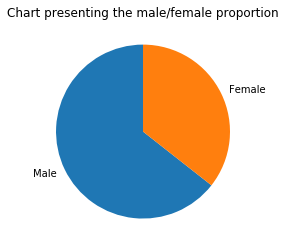

In [136]:
plt.pie(titanic.sex.value_counts(),labels=['Male','Female'],startangle=90)
plt.title("Chart presenting the male/female proportion")
plt.show()

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
############################################################################################################################

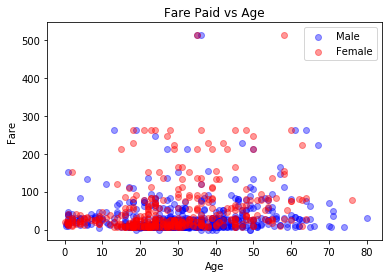

In [137]:
plt.scatter(titanic[titanic.sex == 'male'].age, titanic[titanic.sex == 'male'].fare, label = 'Male', alpha=0.4, color = 'b')
plt.scatter(titanic[titanic.sex == 'female'].age, titanic[titanic.sex == 'female'].fare, label = 'Female', alpha=0.4, color = 'r')
plt.title('Fare Paid vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

#############################################################################################################################

In [138]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [139]:
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [140]:
df.shape

(5, 4)

**Task2**
1. Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).

In [141]:
df.FlightNumber

0    10045.0
1        NaN
2    10065.0
3        NaN
4    10085.0
Name: FlightNumber, dtype: float64

In [142]:
def flight_list(y):
    i=0
    for i in range(1,y):
        df.loc[i,'FlightNumber'] = df.loc[i-1,'FlightNumber']+10



In [143]:
df['FlightNumber'].fillna(0, inplace=True)
df['FlightNumber'] = df['FlightNumber'].astype(int)
flight_list(len(df.FlightNumber))

In [144]:
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


#############################################################################################################################

2. The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.

In [145]:
def Fromsplitstring(str):
    return str.split('_')[0]

def Tosplitstring(str):
    return str.split('_')[1]

FromList = df['From_To'].apply(Fromsplitstring)
ToList = df['From_To'].apply(Tosplitstring)
#print(FromList)
#print(ToList)
df_temp = pd.DataFrame()
df_temp["From"] = FromList
df_temp["To"] = ToList
df_temp["FlightNumber"] = df.FlightNumber
df_temp["RecentDelays"] = df.RecentDelays
df_temp["Airline"] = df.Airline
df_temp.head()

,From,To,FlightNumber,RecentDelays,Airline
0,LoNDon,paris,10045,"[23, 47]",KLM(!)
1,MAdrid,miLAN,10055,[],<Air France> (12)
2,londON,StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,PaRis,10075,[13],12. Air France
4,Brussels,londOn,10085,"[67, 32]","""Swiss Air"""


#############################################################################################################################

3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)

In [146]:
df_temp["From"] = df_temp["From"].apply(str.title)

In [147]:
df_temp["To"] = df_temp["To"].apply(str.title)

In [148]:
df_temp.head()

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


#############################################################################################################################

4. Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.

In [149]:
df.drop('From_To', axis=1, inplace=True)
df = pd.concat([df_temp.From, df_temp.To, df], axis=1)
df.head()

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


#############################################################################################################################

5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delay

In [151]:
DelayList =[]
for val in range(len(df.RecentDelays)):
    DelayList.append(len(df.RecentDelays[val]))
max_columns = max(DelayList)
#print(DelayList)
New_RecentDelays = []
Two_dim_RecentDelays = []
for outeritems in df.RecentDelays:
    New_RecentDelays = outeritems
    count = len(outeritems)
    while(count<max_columns):
        New_RecentDelays.append(np.NaN)
        count +=1
    Two_dim_RecentDelays.append(New_RecentDelays)
#print(Two_dim_RecentDelays)
Delays = pd.DataFrame(Two_dim_RecentDelays)
column_list = []
for count in range(1,max_columns+1):
    column_list.append('delay_'+str(count))
Delays.columns = column_list
#print(Delays)
df.drop('RecentDelays', axis=1, inplace=True)
df = pd.concat([df, Delays], axis=1)
df.head()

,From,To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,London,Paris,10045,KLM(!),23.0,47.0,NaN
1,Madrid,Milan,10055,<Air France> (12),NaN,NaN,NaN
2,London,Stockholm,10065,(British Airways. ),24.0,43.0,87.0
3,Budapest,Paris,10075,12. Air France,13.0,NaN,NaN
4,Brussels,London,10085,"""Swiss Air""",67.0,32.0,NaN
